In [2]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

# imports
%matplotlib inline
import numpy as np
from scipy import interpolate
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
sns.set_style("darkgrid")

# Lesson 4 Supplemental Materials

There are few concepts in lesson 4 that routinely raise questions for students. Let's address some of them.

## Dimensions/Dimensionality
The dimension is the number of decision variables that a problem has. For continuous variable problems (these are the f(x) type problems where the decision variable can take on any number) we talk about the number of dimensions as the number of $x$ variables ($x1, x2, x3$), but that's just a convention. We could use any letter. 

Let's look at a quick example. 

### One Dimension
This is a 1 dimensional function - we only have 1 variable - $x$.

$f(x) = |x|^{(sin(3x))} + |x|^{(cos(2x))}$

In case some of this notation is new to you, the || means "the absolute value of" whatever is inside the pipe symbols. We wouldn't need to do that, except for the fact that numpy gets confused about fractional exponents and this "fixes" it. Just go with it. 

### Two Dimensions
This is a 2 dimension problem, because we have 2 decision variables ($x,y$):

$f(x,y) = |x|^{(sin(3x))} + |x|^{(cos(2x))} + |y|^{(sin(3y))} + |y|^{(cos(2y))}$

*Note*: we're doing all the same math with both x and y and adding them together. That's going to come in handy in a little bit here.

We can easily plot our 1 dimension functions on a simple x, y graph. 

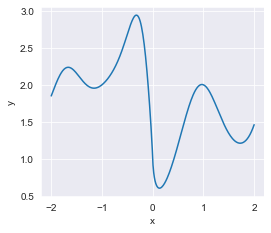

In [3]:
# plot p(x) on [-2,2], using 300 points - the higher the number the smoother the line
x = np.linspace(-2,2,300)

#this is the one-dimension function
p = lambda x:np.abs(x)**(np.sin(3*x)) + np.abs(x)**(np.cos(2*x))

#plot the function
fig = plt.figure(figsize=(4,3.5))
plt.plot(x,p(x));
plt.xlabel('x');
plt.ylabel('y');


Functions that contain more than 2 dimensions become more difficult to display visually. But, we can display 2 dimensional functions. Here's what our 2 dimensional function looks like.

In [ ]:
# 3D graph of 2 dimemsional problem
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np

x = np.linspace(-2, 2, 401)     
y = np.linspace(-2, 2, 401)     
X, Y = np.meshgrid(x, y) 
Z = (np.abs(X)**(np.sin(3*X)) + np.abs(X)**(np.cos(2*X))) + (np.abs(Y)**(np.sin(3*Y)) + np.abs(Y)**(np.cos(2*Y)))


data = [
    go.Surface( x = X, y = Y, z = Z, colorscale = 'Jet',
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=True,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        )
    )
]

layout = go.Layout(title='2 Dimensional Function',width=600,height=600)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


### Bounds and 1 Dimension Functions

Now let's find all the minima with our 1 dimensional function within the bounds of [-2,2]. Remember that scipi optimize will find the **closest** minimum or maximum to the start point, so to find all of them, we'll have to pick start points that will let the algorithm "fall into" the correct trough, or "climb" the correct hill. How many minima do you see? How many starting points will we need? 

*Note*: the points at the bounds are neither minima nor maxima. We don't know where they "go" after the bounds, so we can't make any assumptions.

#### Bounds with scipy minimize
To set bounds when you're calling scipy minimize, you can use the 'TNC' method and the bounds parameter. For a 1 dimensional problem, you'll need a single minimum and maximum tuple in an array. 

*Note:* When you set bounds, scipy passes back an array for the function instead of single value, at least some of the time. If you're ever getting errors with your string formatting, print out the result and double check what scipy has given you.



There is a local minimum value of 1.95 at x = -1.16
There is a local minimum value of 0.60 at x = 0.13
There is a local minimum value of 1.21 at x = 1.73


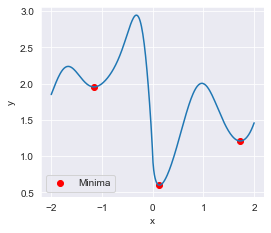

In [6]:
from scipy.optimize import minimize
# We see 3 minima, so we'll need 3 starting points
x0_min = [-1,-.1,1.2]
min_x = []
min_y = []
for x0 in x0_min:
    ####################################
    # Note setting bounds here
    ####################################
    result = minimize(p,x0,method='TNC', bounds=[(-2,2)])
    min_x.append(result.x[0])
    min_y.append(result.fun[0])
    print('There is a local minimum value of {:3.2f} at x = {:1.2f}'.format(result.fun[0],result.x[0]))


#replot with the points added
x = np.linspace(-2,2,300)
fig = plt.figure(figsize=(4,3.5))
plt.plot(x,p(x));
plt.xlabel('x');
plt.ylabel('y');

#add dots on the line for min
plt.scatter(min_x, min_y, color="red", label="Minima")
plt.legend(loc="lower left")        

### Bounds with Multi-dimensional Problems

To use bounds with multi-dimensional problems, we need to set an array with a tuple of the min and max boundary for each dimension. 

Let's get one of the minima from our 2 dimensional problem. (If you can roll your mouse over that visual you can get some idea of possible starting points, but we're just going to randomly generate one.)

In [7]:
from scipy.optimize import minimize
# We see 3 minima, so we'll need 3 starting points
dim = 2

#this returns a numpy array, with as many values as your dimensions
x_initial = np.random.uniform(-2, 2, dim)
print('x_initial = ', x_initial)


#define a function (more on this in a minute)
def twoD(start):
    return sum((np.abs(start)**(np.sin(3*start)) + np.abs(start)**(np.cos(2*start))))


####################################
# Note setting bounds here - 2 tuples for 2 dimensions
####################################
#note that you can multiply this array by the number of dimensions to get a repeating tuple
bounds = [(-2,2)] * dim
print('Bounds = ', bounds)

#get a result
result = minimize(twoD,x_initial,method='TNC', bounds=bounds)

print('There is a local minimum value of {:3.2f} at x = {:1.2f} and y = {:1.2f}'.format(result.fun,result.x[0],result.x[1]))


x_initial =  [1.5594864  1.64217952]
Bounds =  [(-2, 2), (-2, 2)]
There is a local minimum value of 2.42 at x = 1.73 and y = 1.73


#### What's up with that function?

Did you look at that function and wonder what the heck was happening there? Let's break it down. Remember when I said that our 2 dimensional function did all the same "math" with both variables? Well, if we pass in a numpy array to our twoD function, it will do the math for each variable. Let's see what that looks like if we do it with a simpler function. First we'll create a super simple function. It's just going to multiply what's passed in by 10.

In [8]:
def simpleFunction(xy):
    print(xy * 10)

#pass in a single integer    
simpleFunction(5)    

50


Note that if we pass in an number, it returns a number. We're familiar with that. All good.

What happens if we pass in a regular list?

In [151]:
simpleFunction([5,10])

[5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10]


Well, that didn't do what we wanted, did it? That gave us a list with 10 of each of the items in our list. (Note, this is exactly how we got our bounds for 2D problem above. Cool!)

Now what happens if we pass in a numpy array?

In [152]:
#pass in a numpy array
my_np_array=np.array([5,10])
simpleFunction(my_np_array)

[ 50 100]


Hey now - that's more like it. We multiplied each of our variables by 10. 

We're still not quite where we want to be though, right? Remember our original function added our 2 results together. Easy peasy. We can just wrap the "math bits" with sum in our function.

Let's try it out.

In [154]:
def simpleFunction2(xy):
    print(sum(xy * 10))
    
simpleFunction2(my_np_array)    

150


Voila! Our $twoD()$ function is doing the exact same thing, just with more "math bits."

## Multi-start Problems

Multi-start problems just mean that we start the problem multiple times from multiple different starting locations. We did a hard-coded multi-start problem above when finding all of the minima in our 1-dimensional problem. 

When we look at our 2 dimensional graph, it's pretty hard to figure out where to start by hand, so we can code a multi-start problem to start multiple times, from multiple random locations. In your lesson, you did this to solve the rastrigin problem. But you can do it to solve any problem. Let's try to find the minimum value that we can for our 2-dimension problem by using a multi-start process.

In [143]:
#sticking with 2 dimensions here
dim = 2
#this tells us how many local searches (starts) we want to do
num_local_searches = 1000
#since we're minimizing, we're starting with our best_value as a large positive number, 
#knowing that any solution we find will be smaller
best_value = 1.e10

for i in range(num_local_searches):
    x_initial = np.random.uniform(-2, 2, dim) #we want to make sure we start in the right space (-2,2)
    #get a result for a single starting point - remember to stay within our bounds
    result = minimize(twoD, x_initial,method='TNC', bounds=bounds)
    #if this result is less than our current value, keep it
    if result.fun < best_value:
        best_value = result.fun
        best_x = result.x

print(
    'The smallest value found is {:4.3f} at x = {:1.3f} and y = {:1.3f}'.format(
        best_value, best_x[0], best_x[1]))

The smallest value found is 1.199 at x = 0.134 and y = 0.134
